In [59]:
#import keras
from scipy.io import wavfile
import numpy as np
import IPython
import matplotlib.pyplot as plt

%matplotlib inline




### Try that audio works in jupyter

This is a markdown cell

In [15]:

framerate = 44100
t = np.linspace(0,5,framerate*5)
data = np.sin(2*np.pi*220*t) + np.sin(2*np.pi*224*t)
IPython.display.Audio(data,rate=framerate)

### Splice mp3 files to 10-second wav chunks

In [30]:
!ls data

chunk_seconds = 10
piece = "Fintelligens - Stockholm-Helsinki"
for part in ["instrumental", "with-vocals"]:
    prefix = "data/{}/{}".format(piece, part)
    !mkdir -p "{prefix}"
    log = !ffmpeg -i "{prefix}.mp3" -f segment -segment_time {chunk_seconds} "{prefix}/%03d.wav"


Fintelligens - Stockholm-Helsinki


### Load a pair or chunks and visualize side by side


Loaded data/Fintelligens - Stockholm-Helsinki/instrumental/000.wav (441216, 2)
Loaded data/Fintelligens - Stockholm-Helsinki/with-vocals/000.wav (441216, 2)


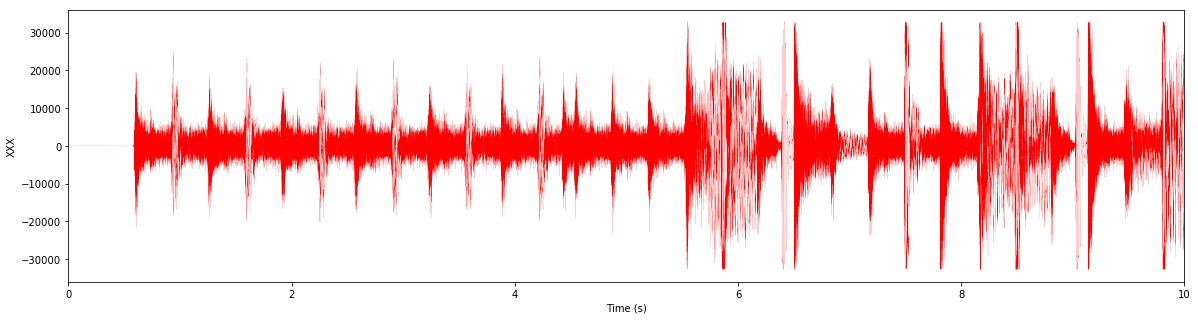

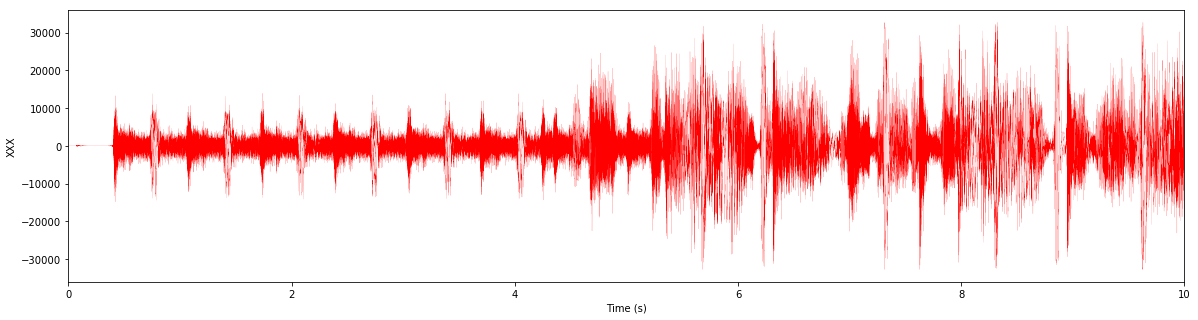

In [57]:

data = {}
for (i, part) in enumerate(["instrumental", "with-vocals"]):
    filename = "data/{}/{}/000.wav".format(piece, part)
    raw = wavfile.read(filename)
    data[i] = np.array(raw[1],dtype=float)
    print("Loaded", filename, data[i].shape)

arr = data[0]
x = np.arange(0, arr.shape[0], dtype=float) / arr.shape[0] * chunk_seconds
def init_fig():
    plt.figure(figsize=(20,5))
    plt.ylabel("XXX")
    plt.xlabel("Time (s)")
    axes = plt.gca()
    axes.set_xlim([0, chunk_seconds])
    plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1000))

def audio(data, framerate):
    IPython.display.display(IPython.display.Audio(data,rate=framerate))

framerate = data[0].shape[0] / chunk_seconds


for part in [0, 1]:
    for channel in [0]:
        init_fig()
        plt.plot(x, data[part][:,channel], linewidth=0.1, color='red')
        audio(data[part][:,0], framerate)
# TODO: utilize both stereo channels somehow?



### Preprocess the chunks

We need to align the timing of the chunks to match, and scale (not sure if scaling is needed, doesn't affect DFT?).
Should we take DFT and only align time after that?
What would be a good metric for alignment? Start by trying L2 norm?
If we align in time space with L2 norm, we need to normalize first. Maybe try going to frequency space first?